In [1]:
from sympy import *
from sympy.utilities.codegen import codegen
init_printing()

In [2]:
# state
x, y, z, vx, vy, vz, m = symbols('x y z vx vy vz m')
r = Matrix([x, y, z])
v = Matrix([vx, vy, vz])
s = Matrix([r, v, [m]])
rmag = sqrt(x**2 + y**2 + z**2)

# costate
lx, ly, lz, lvx, lvy, lvz, lm = symbols('lx ly lz lvx lvy lvz lm')
lr = Matrix([lx, ly, lz])
lv = Matrix([lvx, lvy, lvz])
l = Matrix([lr, lv, [lm]])
lrmag, lvmag = symbols('lr lv')

# full state 
fs = Matrix([s, l])

# controls
u, ix, iy, iz = symbols('u ix iy iz')
i = Matrix([ix, iy, iz])

# parametres
c1, c2, alpha, mu = symbols('c1 c2 alpha mu')

In [3]:
# state equations of motion
ds = Matrix([
    v,
    (-mu/rmag**3)*r + (c1*u/m)*i,
    [-c2*u]
])
ds

⎡            vx             ⎤
⎢                           ⎥
⎢            vy             ⎥
⎢                           ⎥
⎢            vz             ⎥
⎢                           ⎥
⎢c₁⋅ix⋅u          μ⋅x       ⎥
⎢─────── - ─────────────────⎥
⎢   m                    3/2⎥
⎢          ⎛ 2    2    2⎞   ⎥
⎢          ⎝x  + y  + z ⎠   ⎥
⎢                           ⎥
⎢c₁⋅iy⋅u          μ⋅y       ⎥
⎢─────── - ─────────────────⎥
⎢   m                    3/2⎥
⎢          ⎛ 2    2    2⎞   ⎥
⎢          ⎝x  + y  + z ⎠   ⎥
⎢                           ⎥
⎢c₁⋅iz⋅u          μ⋅z       ⎥
⎢─────── - ─────────────────⎥
⎢   m                    3/2⎥
⎢          ⎛ 2    2    2⎞   ⎥
⎢          ⎝x  + y  + z ⎠   ⎥
⎢                           ⎥
⎣           -c₂⋅u           ⎦

In [4]:
# define the Lagrangian
L = alpha*u + (1 - alpha)*u**2
L

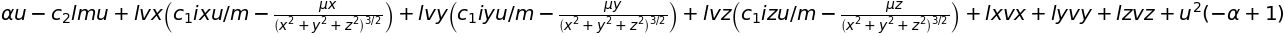

In [5]:
# create Hamiltonian
H = l.dot(ds) + L
H

In [6]:
# costate equations of motion
dl = -Matrix([H.diff(i) for i in s])
print(cse(dl))

([(x0, x**2), (x1, y**2), (x2, z**2), (x3, x0 + x1 + x2), (x4, x3**(-5/2)), (x5, 3*lvy*mu*x4*y), (x6, 3*lvz*mu*x4*z), (x7, -mu/x3**(3/2)), (x8, 3*mu*x4), (x9, 3*lvx*mu*x*x4), (x10, c1*u/m**2)], [Matrix([
[     -lvx*(x0*x8 + x7) - x*x5 - x*x6],
[     -lvy*(x1*x8 + x7) - x6*y - x9*y],
[     -lvz*(x2*x8 + x7) - x5*z - x9*z],
[                                 -lx],
[                                 -ly],
[                                 -lz],
[ix*lvx*x10 + iy*lvy*x10 + iz*lvz*x10]])])


In [8]:
# full state equations of motion
dfs = Matrix([ds, dl])
print(cse(dfs))

([(x0, c1*u/m), (x1, x**2), (x2, y**2), (x3, z**2), (x4, x1 + x2 + x3), (x5, mu/x4**(3/2)), (x6, x4**(-5/2)), (x7, 3*lvy*mu*x6*y), (x8, 3*lvz*mu*x6*z), (x9, -x5), (x10, 3*mu*x6), (x11, 3*lvx*mu*x*x6), (x12, c1*u/m**2)], [Matrix([
[                                  vx],
[                                  vy],
[                                  vz],
[                        ix*x0 - x*x5],
[                        iy*x0 - x5*y],
[                        iz*x0 - x5*z],
[                               -c2*u],
[    -lvx*(x1*x10 + x9) - x*x7 - x*x8],
[   -lvy*(x10*x2 + x9) - x11*y - x8*y],
[   -lvz*(x10*x3 + x9) - x11*z - x7*z],
[                                 -lx],
[                                 -ly],
[                                 -lz],
[ix*lvx*x12 + iy*lvy*x12 + iz*lvz*x12]])])


In [ ]:
# Hamiltionian terms with throttle
ueq = (1 - sigma)*u**2 + u*(sigma - lm*c2 - lvmag*c1/m)
ueq

In [ ]:
ueqdiff = ueq.diff(u)
ueqdiff

In [ ]:
ustar = simplify(solve(ueqdiff, u))[0]
ustar

In [ ]:
ustar.subs(sigma, 0)

In [ ]:
L

In [ ]:
# switching function
S = u - lm*c2*u - lvmag*c1/m*u
S

In [ ]:
ueq

In [ ]:
ustar

In [ ]:
dfs